# Clustering Analysis for HELP International NGO

# Problem Statement
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.
After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.
Our job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then we need to suggest the countries which the CEO needs to focus on the most. The datasets containing those socio-economic factors and the corresponding data dictionary are provided.

In [ ]:
#Importing all the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
df=pd.read_csv('Country-data.csv')

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
#Converting the data from percentage to numerical form
df['exports'] = df['exports']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100

In [5]:
#Checking for missing values
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
#Checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 12.5+ KB


In [7]:
#Finding if there are outliers
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [8]:
#Wer can clearly see that there are outliers in almost all the variables

In [9]:
df1=df

In [10]:
df.shape

(167, 10)

In [11]:
# removing (statistical) outliers
Q1 = df1.child_mort.quantile(0.05)
Q3 = df1.child_mort.quantile(0.95)
IQR = Q3 - Q1
df1 = df1[(df1.child_mort >= Q1 - 1.5*IQR) & (df1.child_mort <= Q3 + 1.5*IQR)]

# removing (statistical) outliers
Q1 = df1.exports.quantile(0.05)
Q3 = df1.exports.quantile(0.95)
IQR = Q3 - Q1
df1 = df1[(df1.exports >= Q1 - 1.5*IQR) & (df1.exports <= Q3 + 1.5*IQR)]


# removing (statistical) outliers
Q1 = df1.health.quantile(0.05)
Q3 = df1.health.quantile(0.95)
IQR = Q3 - Q1
df1 = df1[(df1.health >= Q1 - 1.5*IQR) & (df1.health <= Q3 + 1.5*IQR)]

# removing (statistical) outliers
Q1 = df1.imports.quantile(0.05)
Q3 = df1.imports.quantile(0.95)
IQR = Q3 - Q1
df1 = df1[(df1.imports >= Q1 - 1.5*IQR) & (df1.imports <= Q3 + 1.5*IQR)]

# removing (statistical) outliers
Q1 = df1.income.quantile(0.05)
Q3 = df1.income.quantile(0.95)
IQR = Q3 - Q1
df1 = df1[(df1.income >= Q1 - 1.5*IQR) & (df1.income <= Q3 + 1.5*IQR)]

# removing (statistical) outliers
Q1 = df1.inflation.quantile(0.05)
Q3 = df1.inflation.quantile(0.95)
IQR = Q3 - Q1
df1 = df1[(df1.inflation >= Q1 - 1.5*IQR) & (df1.inflation <= Q3 + 1.5*IQR)]

# removing (statistical) outliers
Q1 = df1.life_expec.quantile(0.05)
Q3 = df1.life_expec.quantile(0.95)
IQR = Q3 - Q1
df1 = df1[(df1.life_expec >= Q1 - 1.5*IQR) & (df1.life_expec <= Q3 + 1.5*IQR)]

# removing (statistical) outliers
Q1 = df1.total_fer.quantile(0.05)
Q3 = df1.total_fer.quantile(0.95)
IQR = Q3 - Q1
df1 = df1[(df1.total_fer >= Q1 - 1.5*IQR) & (df1.total_fer <= Q3 + 1.5*IQR)]

# removing (statistical) outliers
Q1 = df1.gdpp.quantile(0.05)
Q3 = df1.gdpp.quantile(0.95)
IQR = Q3 - Q1
df1 = df1[(df1.gdpp >= Q1 - 1.5*IQR) & (df1.gdpp <= Q3 + 1.5*IQR)]

In [12]:
df1.shape

(163, 10)

In [13]:
l=list(df1.country)
l1=list(df.country)

In [14]:
s=[i for i in l1 if i not in l]
s

['Luxembourg', 'Nigeria', 'Qatar', 'Singapore']

In [15]:
#These countries wont be included in our analysis,which is a dangerous omission because they also have to be considered as part of our analysis

In [16]:
l=[i for i in df.columns if i!='country']

In [17]:
df_notnormal=df

In [18]:
df[l].head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [19]:
#Normalizing the data
normalized_df=(df[l]-df[l].mean())/df[l].std()

In [20]:
df=pd.concat([df['country'],normalized_df],axis=1)

In [21]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.287660,-0.409779,-0.563346,-0.430979,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,Albania,-0.537333,-0.349141,-0.437901,-0.312737,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,Algeria,-0.272015,-0.317571,-0.483372,-0.352660,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,Angola,2.001787,-0.290501,-0.530767,-0.344915,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,Antigua and Barbuda,-0.693548,-0.104019,-0.178234,0.040613,0.101427,-0.599944,0.702147,-0.540321,-0.041692


In [22]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.287660,-0.409779,-0.563346,-0.430979,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,Albania,-0.537333,-0.349141,-0.437901,-0.312737,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,Algeria,-0.272015,-0.317571,-0.483372,-0.352660,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,Angola,2.001787,-0.290501,-0.530767,-0.344915,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,Antigua and Barbuda,-0.693548,-0.104019,-0.178234,0.040613,0.101427,-0.599944,0.702147,-0.540321,-0.041692


In [23]:
X=df.drop(['country'],axis=1)

In [24]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.287660,-0.409779,-0.563346,-0.430979,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,Albania,-0.537333,-0.349141,-0.437901,-0.312737,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,Algeria,-0.272015,-0.317571,-0.483372,-0.352660,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,Angola,2.001787,-0.290501,-0.530767,-0.344915,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,Antigua and Barbuda,-0.693548,-0.104019,-0.178234,0.040613,0.101427,-0.599944,0.702147,-0.540321,-0.041692


In [25]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [26]:
#Performing the PCA
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [27]:
#List of PCA components.
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [28]:
colnames = list(X.columns)
#oolnames
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.287660,-0.409779,-0.563346,-0.430979,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,-0.537333,-0.349141,-0.437901,-0.312737,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,-0.272015,-0.317571,-0.483372,-0.352660,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,2.001787,-0.290501,-0.530767,-0.344915,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,-0.693548,-0.104019,-0.178234,0.040613,0.101427,-0.599944,0.702147,-0.540321,-0.041692


In [29]:
#Storing the first two PCA componenets in a dataframe
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.316392,0.476267,child_mort
1,0.342887,0.397311,exports
2,0.358535,0.155053,health
3,0.344865,0.370781,imports
4,0.380041,0.128384,income


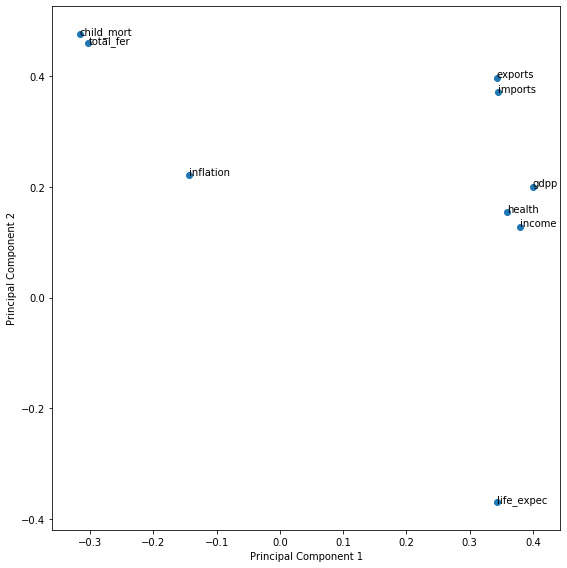

In [30]:
# Let's plot them to visualise how these features are loaded
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [31]:
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

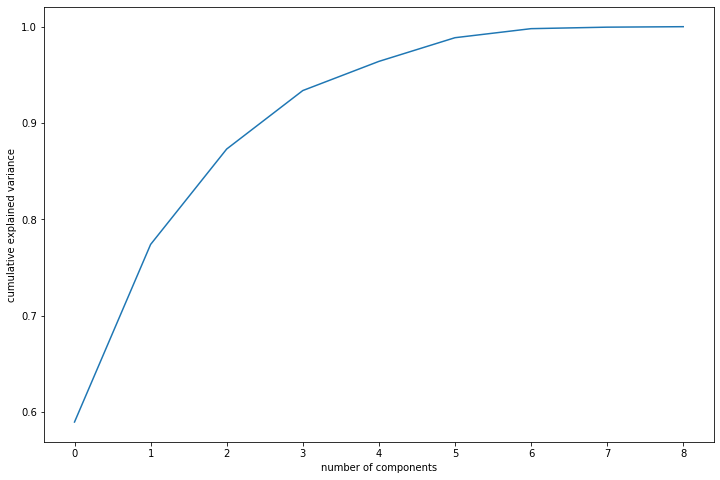

In [32]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [33]:
#From the graph we can see that first 4 components explain almost 95% of the variance

In [34]:
#Finally let's go ahead and do dimensionality reduction using the four Principal Components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [35]:
df_pca = pca_final.fit_transform(X)
df_pca.shape

(167, 4)

In [36]:
df_pca

array([[-2.62874118e+00,  1.46767135e+00, -5.44861004e-01,
         2.36555663e-01],
       [-2.37738558e-02, -1.43151051e+00, -9.05242609e-03,
        -4.41593143e-01],
       [-4.57882953e-01, -6.76758610e-01,  9.64949591e-01,
        -1.75860279e-01],
       [-2.71541431e+00,  2.16949335e+00,  5.96001416e-01,
         4.37602700e-01],
       [ 6.46831716e-01, -1.02342010e+00, -2.43438161e-01,
        -2.66711273e-01],
       [ 3.63375066e-02, -6.82569373e-01,  1.46096670e+00,
         6.58696223e-02],
       [-3.33271825e-01, -1.27519742e+00,  1.90199898e-01,
        -4.99931827e-01],
       [ 3.17481317e+00, -2.37658420e-01, -1.68034623e-01,
         1.66468894e+00],
       [ 3.80668849e+00,  2.61826282e-01, -2.96444558e-01,
         9.71483404e-01],
       [-4.66073698e-01, -4.92579135e-01,  6.06780578e-01,
        -2.57741740e-01],
       [ 1.49508322e+00, -4.24607534e-01, -5.56127361e-01,
         2.24293753e-01],
       [ 1.46688131e+00, -3.24757667e-01,  4.25272330e-01,
      

In [37]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_pca)

In [38]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1]})

In [39]:
pcs_df2.head()

,PC1,PC2
0,-2.628741,1.467671
1,-0.023774,-1.431511
2,-0.457883,-0.676759
3,-2.715414,2.169493
4,0.646832,-1.023420


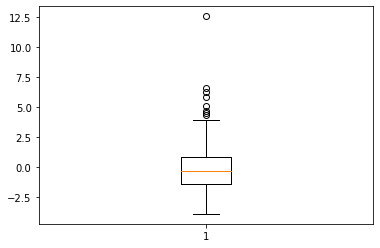

In [40]:
## Let's perform Outlier Analysis
#Let's do the outlier analysis before proceeding to clustering
#We can reassign the outliers to the clusters later
plt.boxplot(pcs_df2.PC1)
Q1 = pcs_df2.PC1.quantile(0.05)
Q3 = pcs_df2.PC1.quantile(0.95)
IQR = Q3 - Q1
pcs_df3 = pcs_df2[(pcs_df2.PC1 >= Q1) & (pcs_df2.PC1 <= Q3)]

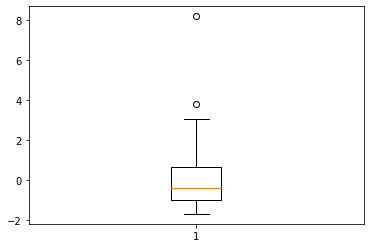

In [41]:
plt.boxplot(pcs_df2.PC2)
Q1 = pcs_df2.PC2.quantile(0.05)
Q3 = pcs_df2.PC2.quantile(0.95)
IQR = Q3 - Q1
pcs_df3 = pcs_df2[(pcs_df2.PC2 >= Q1) & (pcs_df2.PC2 <= Q3)]

In [42]:
pcs_df3.shape

(149, 2)

In [43]:
#Again we can see that we are losing many countries due to outliers.So we cant discard the outliers

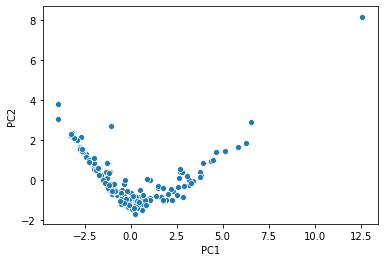

In [44]:
#Visualising the points on the PCs.
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)

In [45]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [46]:
#Let's check the Hopkins measure
hopkins(pcs_df2)

0.9514129648763138

In [47]:
#Since the value is > 0.5 the given dataset has a good tendency to form clusters.

In [48]:
dat3_1 = pcs_df2

In [49]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(dat3_1)
    sse_.append([k, silhouette_score(dat3_1, kmeans.labels_)])

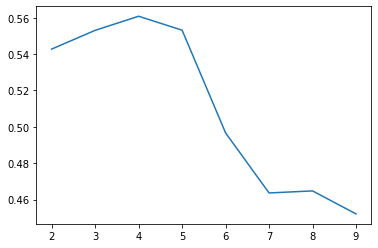

In [50]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

In [51]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dat3_1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(dat3_1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.5427861650901051
For n_clusters=3, the silhouette score is 0.553088679734956
For n_clusters=4, the silhouette score is 0.5608437872728461
For n_clusters=5, the silhouette score is 0.55196916140279
For n_clusters=6, the silhouette score is 0.4966752050789741
For n_clusters=7, the silhouette score is 0.4532908624334531
For n_clusters=8, the silhouette score is 0.4647770627687843


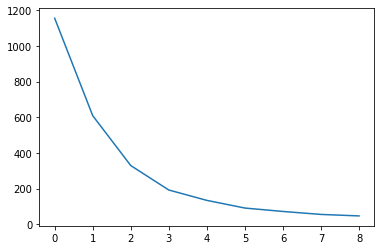

In [52]:
#Now let's proceed to the elbow curve method
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat3_1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [53]:
# Here we're seeing a distinct bend at around 3 clusters

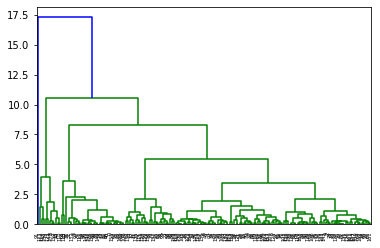

In [54]:
# complete linkage
mergings = linkage(dat3_1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [55]:
#Let's perform K means using K=3
model_clus2 = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
model_clus2.fit(dat3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [56]:
#Assigning the cluster IDs 
dat4=pcs_df2
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus2.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2','ClusterID']
dat_km

,PC1,PC2,ClusterID
0,-2.628741,1.467671,1
1,-0.023774,-1.431511,2
2,-0.457883,-0.676759,2
3,-2.715414,2.169493,1
4,0.646832,-1.023420,2
5,0.036338,-0.682569,2
6,-0.333272,-1.275197,2
7,3.174813,-0.237658,0
8,3.806688,0.261826,0
9,-0.466074,-0.492579,2


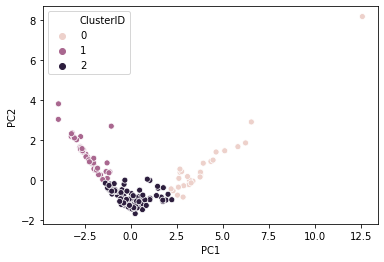

In [57]:
#Visualizing the clusters
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

In [58]:
#Joining the data with the original data and PCA modified dataset
dat5=pd.merge(df_notnormal,dat_km, left_index=True,right_index=True)
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.628741,1.467671,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.023774,-1.431511,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.457883,-0.676759,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.715414,2.169493,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.646832,-1.023420,2


In [59]:
#Analyzing the clusters

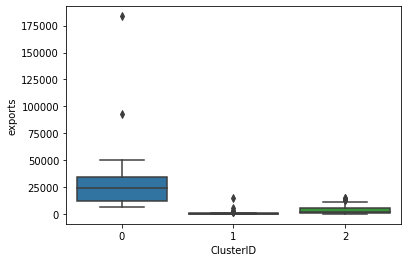

In [60]:
# plot
sns.boxplot(x='ClusterID', y='exports', data=dat5)

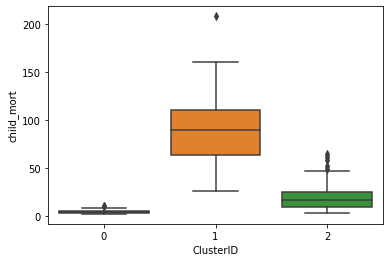

In [61]:
# plot
sns.boxplot(x='ClusterID', y='child_mort', data=dat5)

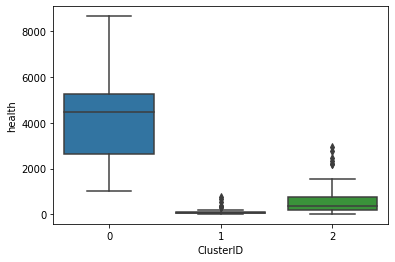

In [62]:
# plot
sns.boxplot(x='ClusterID', y='health', data=dat5)

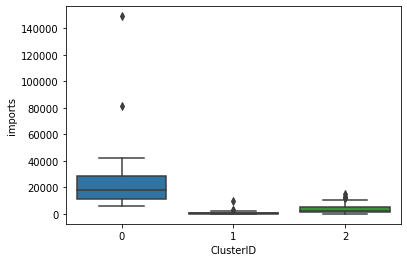

In [63]:
# plot
sns.boxplot(x='ClusterID', y='imports', data=dat5)

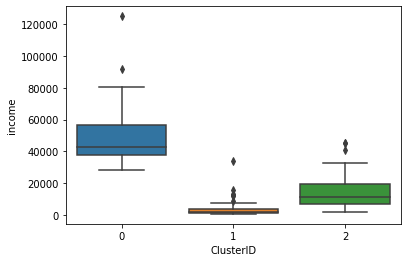

In [64]:
# plot
sns.boxplot(x='ClusterID', y='income', data=dat5)

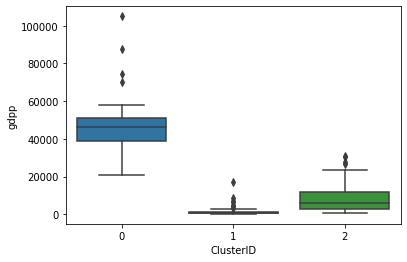

In [65]:
# plot
sns.boxplot(x='ClusterID', y='gdpp', data=dat5)

In [66]:
dat5[dat5['ClusterID']==0]['country']

7                 Australia
8                   Austria
15                  Belgium
23                   Brunei
29                   Canada
42                   Cyprus
44                  Denmark
53                  Finland
54                   France
58                  Germany
68                  Iceland
73                  Ireland
75                    Italy
77                    Japan
82                   Kuwait
91               Luxembourg
98                    Malta
110             Netherlands
111             New Zealand
114                  Norway
123                   Qatar
133               Singapore
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
159           United States
Name: country, dtype: object

In [67]:
dat5[dat5['ClusterID']==1]['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
103     

In [68]:
dat5[dat5['ClusterID']==2]['country']

1                  Albania
2                  Algeria
4      Antigua and Barbuda
5                Argentina
6                  Armenia
              ...         
160                Uruguay
161             Uzbekistan
162                Vanuatu
163              Venezuela
164                Vietnam
Name: country, Length: 91, dtype: object

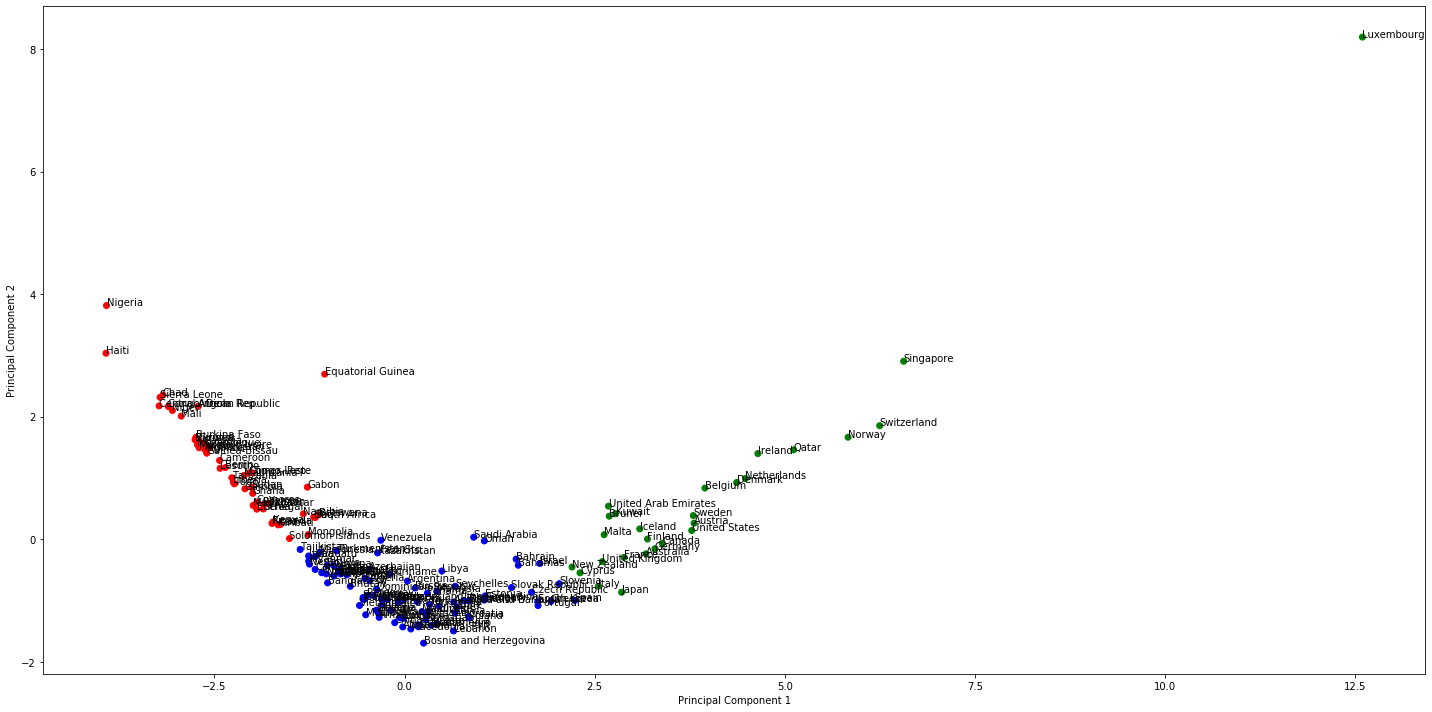

In [69]:
#Analyzing the clusters along with counties 
%matplotlib inline
fig = plt.figure(figsize = (20,10))
plt.scatter(dat5.PC1, dat5.PC2, c = dat5.ClusterID.map({0:'green',1:'red',2:'blue'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(dat5.country):
    plt.annotate(txt, (dat5.PC1[i],dat5.PC2[i]))
plt.tight_layout()
plt.tight_layout()
plt.show()

In [70]:
clu_gdpp = pd.DataFrame(dat5.groupby(["ClusterID"]).gdpp.median())
clu_child_mort=pd.DataFrame(dat5.groupby(["ClusterID"]).child_mort.median())
clu_income =pd.DataFrame(dat5.groupby(["ClusterID"]).income.median())


In [71]:
df = pd.concat([pd.Series([0,1,2]),clu_gdpp,clu_child_mort,clu_income], axis=1)
df.columns = ["ClusterID","GDPP","child_mort","income"]
df

,ClusterID,GDPP,child_mort,income
0,0,46200,4.3,42900
1,1,967,89.3,1870
2,2,5840,17.1,11400


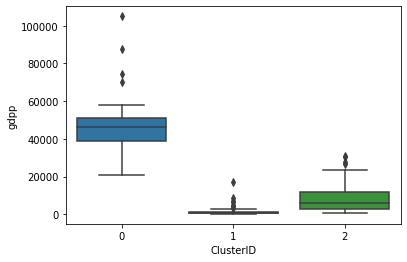

In [72]:
# plot
sns.boxplot(x='ClusterID', y='gdpp', data=dat5)

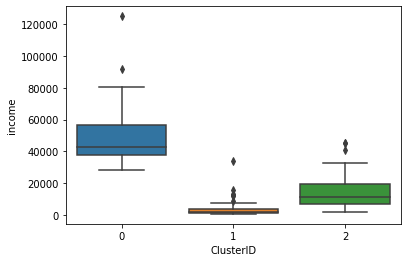

In [73]:
# plot
sns.boxplot(x='ClusterID', y='income', data=dat5)

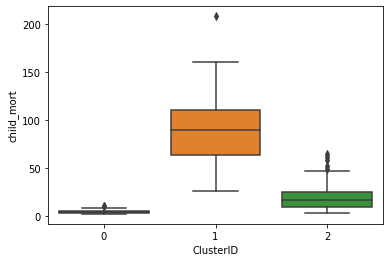

In [74]:
# plot
sns.boxplot(x='ClusterID', y='child_mort', data=dat5)

In [75]:
#Let's use the concept of binning
fin=dat5[dat5['gdpp']<=967]
fin=fin[fin['child_mort']<= 89.3]
fin=fin[fin['income']<= 1870]

In [76]:
fin

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,ClusterID
36,Comoros,88.2,126.8850,34.6819,397.573,1410,3.87,65.9,4.75,769,-1.944088,0.604041,1
50,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482,-1.943153,0.490721,1
56,Gambia,80.3,133.7560,31.9778,239.974,1660,4.30,65.5,5.71,562,-2.099348,0.823289,1
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,-2.252015,0.931472,1
93,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413,-1.991389,0.552216,1
126,Rwanda,63.6,67.5600,59.1150,168.900,1350,2.61,64.6,4.51,563,-1.743530,0.258503,1
155,Uganda,81.0,101.7450,53.6095,170.170,1540,10.60,56.8,6.15,595,-2.614207,1.458074,1


In [77]:
fin.country

36        Comoros
50        Eritrea
56         Gambia
88        Liberia
93     Madagascar
126        Rwanda
155        Uganda
Name: country, dtype: object

In [78]:
l1=dat5['country'].tolist()

In [79]:
l1

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Ita